## OBJECTIVE

Upon initial inspection of the data, we can start thinking of some
questions about it that we would want to answer.

1.  What is the overall sales trend?

2.  Which are the Top 10 products by sales?

3.  Which are the Most Selling Products?

4.  Which is the most preferred Ship Mode?

5.  Which are the Most Profitable Category and Sub-Category?

IMPORTING REQUIRED LIBRARIES

In [21]:
# Data Manipulation
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt

IMPORTING THE DATASET

In [22]:
# Importing dataset
df = pd.read_excel('./Superstore_sales.xlsx')

## DATA AUDIT
You can’t make your data work for you until you know what data you’re talking about.

To get a quick idea of what the data looks like, we can call the head function on the data frame. By default, this returns the top five rows, but it can take in a parameter of how many rows to return.

In [23]:
# First five rows of the dataset
df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",NaN,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [24]:
# Last five rows of the dataset
df.tail(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [25]:
# Shape of the dataset
df.shape

(51290, 21)

In [26]:
# Columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

This looks a lot like an Excel spreadsheet, doesn’t it? Under the hood, the data frame is a two-dimensional data structure and each column can have different types. To show that, we can call dtypes attribute on the data frame to see what each column types are.

In [27]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51289 non-null  float64       
 15  qu

Next, we can look at some descriptive statistics of the data frame with
the describe method.

This shows some descriptive statistics on the data set. Notice, it only
shows the statistics on the numerical columns. From here you can see the
following statistics:

-   Row count, which aligns to what the shape attribute showed us.
-   The mean, or average.
-   The standard deviation, or how spread out the data is.
-   The minimum and maximum value of each column
-   The number of items that fall within the first, second, and third
    percentiles.

In [28]:
# Generating descriptive statistics summary


Now we can do further analysis on our data to answer our questions.
Before that, we should see if there are any missing values in our data
set.To check if there are any missing values in the entire data set we
use the isnull function, then see if there are any values.

In [29]:
# Checking missing values


# EXPLORATORY DATA ANALYSIS

1\. WHAT IS THE OVERALL SALES TREND?

In [30]:
df['sales']

0        408.300
1        120.366
2            NaN
3         44.865
4        113.670
          ...   
51285     13.904
51286      3.990
51287     26.400
51288      7.120
51289      3.024
Name: sales, Length: 51290, dtype: float64

In [31]:
# Getting month year from order_date
df['sales'].mean()

246.49409795238745

In [32]:
df.loc[2, 'sales'] = df['sales'].mean()

In [33]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

Data is now clean

In [34]:
df['month_year'] = df['order_date'].apply(lambda x : x.strftime('%Y-%m'))
df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [35]:
pd.DataFrame(df.groupby('month_year').sales.sum())

,sales
month_year,
2011-01,99078.862958
2011-02,91152.156980
2011-03,145729.367360
2011-04,116915.764180
2011-05,146747.836100
2011-06,215207.380220
2011-07,115510.419120
2011-08,207581.491220
2011-09,290214.455340


2\. WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [36]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('product_name').sales.sum())
# Sorting the dataframe in descending order
prod_sales.sort_values(by='sales', ascending=False)[:10]

# Top 10 products by sales

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


3\. WHICH ARE THE MOST SELLING PRODUCTS?

In [37]:
# Grouping products by Quantity
prod_sales = pd.DataFrame(df.groupby('product_name').quantity.sum())
# Sorting the dataframe in descending order
prod_sales.sort_values(by='quantity', ascending=False)[:10]

# Most selling products

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


4\. WHAT IS THE MOST PREFERRED SHIP MODE?

In [38]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300000,2,0.0,106.1400,35.460,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366000,3,0.1,36.0360,9.720,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",246.494098,4,0.0,29.6400,8.170,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865000,3,0.5,-26.0550,4.820,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670000,5,0.1,37.7700,4.700,Medium,2011,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904000,2,0.2,4.5188,0.890,Medium,2014,2014-12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990000,1,0.0,0.4200,0.490,Medium,2014,2014-12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400000,3,0.0,12.3600,0.350,Medium,2014,2014-12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120000,1,0.0,0.5600,0.199,Medium,2014,2014-12


In [39]:
df.groupby('ship_mode').order_id.count()

ship_mode
First Class        7505
Same Day           2701
Second Class      10309
Standard Class    30775
Name: order_id, dtype: int64

5\. WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [40]:
# Grouping products by Category and Sub-Category
df.groupby(['category', 'sub_category']).sum('profit')['profit']
# Sorting the values


category         sub_category
Furniture        Bookcases       161924.41950
                 Chairs          141973.79750
                 Furnishings      46967.42550
                 Tables          -64083.38870
Office Supplies  Appliances      141680.58940
                 Art              57953.91090
                 Binders          72449.84600
                 Envelopes        29601.11630
                 Fasteners        11525.42410
                 Labels           15010.51200
                 Paper            59207.68270
                 Storage         108461.48980
                 Supplies         22583.26310
Technology       Accessories     129626.30620
                 Copiers         258567.54818
                 Machines         58867.87300
                 Phones          216717.00580
Name: profit, dtype: float64

# Lecture 4

In [ ]:
from datetime import date
df = pd.read_excel('./Superstore_sales.xlsx')

In [47]:
df[['prod_brand', 'prod_fead']] = df['product_name'].str.split(pat = ', ', n=1, expand = True)
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,prod_brand,prod_fead
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,Tenex Lockers,Blue
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,Acme Trimmer,High Speed
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",NaN,4,0.0,29.6400,8.170,High,2011,Tenex Box,Single Width
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,Enermax Note Cards,Premium
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,Eldon Light Bulb,Duo Pack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,Cardinal Slant-D Ring Binder,Heavy Gauge Vinyl
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,Wilson Jones Hole Reinforcements,Clear
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,Hon Color Coded Labels,5000 Label Set
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,Hon Legal Exhibit Labels,Alphabetical


In [48]:
clean_df = df.drop(['order_id','customer_name', 'product_name', 'product_id', 'year'], axis=1)
clean_df

,order_date,ship_date,ship_mode,segment,state,country,market,region,category,sub_category,sales,quantity,discount,profit,shipping_cost,order_priority,prod_brand,prod_fead
0,2011-01-01,2011-01-06,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,408.300,2,0.0,106.1400,35.460,Medium,Tenex Lockers,Blue
1,2011-01-01,2011-01-08,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,120.366,3,0.1,36.0360,9.720,Medium,Acme Trimmer,High Speed
2,2011-01-01,2011-01-05,Second Class,Consumer,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,NaN,4,0.0,29.6400,8.170,High,Tenex Box,Single Width
3,2011-01-01,2011-01-05,Second Class,Home Office,Stockholm,Sweden,EU,North,Office Supplies,Paper,44.865,3,0.5,-26.0550,4.820,High,Enermax Note Cards,Premium
4,2011-01-01,2011-01-08,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,113.670,5,0.1,37.7700,4.700,Medium,Eldon Light Bulb,Duo Pack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-12-31,2015-01-04,Standard Class,Corporate,California,United States,US,West,Office Supplies,Binders,13.904,2,0.2,4.5188,0.890,Medium,Cardinal Slant-D Ring Binder,Heavy Gauge Vinyl
51286,2014-12-31,2015-01-05,Standard Class,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,Office Supplies,Binders,3.990,1,0.0,0.4200,0.490,Medium,Wilson Jones Hole Reinforcements,Clear
51287,2014-12-31,2015-01-02,Second Class,Consumer,Managua,Nicaragua,LATAM,Central,Office Supplies,Labels,26.400,3,0.0,12.3600,0.350,Medium,Hon Color Coded Labels,5000 Label Set
51288,2014-12-31,2015-01-06,Standard Class,Consumer,Chihuahua,Mexico,LATAM,North,Office Supplies,Labels,7.120,1,0.0,0.5600,0.199,Medium,Hon Legal Exhibit Labels,Alphabetical


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

clean_df['segment'] = le.fit_transform(clean_df['segment'])
clean_df['ship_mode'] = le.fit_transform(clean_df['ship_mode'])
clean_df['state'] = le.fit_transform(clean_df['state'])
clean_df['country'] = le.fit_transform(clean_df['country'])
clean_df['market'] = le.fit_transform(clean_df['market'])
clean_df['region'] = le.fit_transform(clean_df['region'])
clean_df['category'] = le.fit_transform(clean_df['category'])
clean_df['sub_category'] = le.fit_transform(clean_df['sub_category'])
clean_df['order_priority'] = le.fit_transform(clean_df['order_priority'])
clean_df['prod_fead'] = le.fit_transform(clean_df['prod_fead'])
clean_df['prod_brand'] = le.fit_transform(clean_df['prod_brand'])
clean_df


,order_date,ship_date,ship_mode,segment,state,country,market,region,category,sub_category,sales,quantity,discount,profit,shipping_cost,order_priority,prod_brand,prod_fead
0,2011-01-01,2011-01-06,3,0,255,2,1,0,1,14,408.300,2,0.0,106.1400,35.460,3,1971,153
1,2011-01-01,2011-01-08,3,0,702,6,0,9,1,15,120.366,3,0.1,36.0360,9.720,3,111,232
2,2011-01-01,2011-01-05,2,0,175,56,3,5,1,14,NaN,4,0.0,29.6400,8.170,1,1958,320
3,2011-01-01,2011-01-05,2,2,939,123,4,7,1,12,44.865,3,0.5,-26.0550,4.820,1,759,289
4,2011-01-01,2011-01-08,3,0,702,6,0,9,0,9,113.670,5,0.1,37.7700,4.700,3,718,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-12-31,2015-01-04,3,1,192,139,6,12,1,3,13.904,2,0.2,4.5188,0.890,3,519,231
51286,2014-12-31,2015-01-05,3,0,923,85,1,0,1,3,3.990,1,0.0,0.4200,0.490,3,2069,170
51287,2014-12-31,2015-01-02,2,0,599,92,5,3,1,10,26.400,3,0.0,12.3600,0.350,3,1056,93
51288,2014-12-31,2015-01-06,3,0,230,81,5,7,1,10,7.120,1,0.0,0.5600,0.199,3,1066,126


In [56]:
x = clean_df.drop('profit',axis=1)
y = clean_df['profit']

In [59]:
cor = round(x.corr(),1)
cor

,order_date,ship_date,ship_mode,segment,state,country,market,region,category,sub_category,sales,quantity,discount,shipping_cost,order_priority,prod_brand,prod_fead
order_date,1.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
ship_date,1.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
ship_mode,-0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.1,0.4,0.0,-0.0
segment,0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
state,-0.0,-0.0,0.0,-0.0,1.0,-0.1,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
country,-0.0,-0.0,-0.0,0.0,-0.1,1.0,0.4,0.1,-0.0,0.0,-0.0,-0.0,0.2,-0.0,0.0,0.0,0.3
market,-0.0,-0.0,-0.0,-0.0,-0.0,0.4,1.0,0.1,-0.0,-0.0,-0.0,0.1,-0.0,-0.1,-0.0,0.0,0.2
region,-0.0,-0.0,-0.0,-0.0,-0.0,0.1,0.1,1.0,-0.0,0.0,0.0,0.1,0.0,0.0,-0.0,0.0,0.1
category,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.1
sub_category,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1


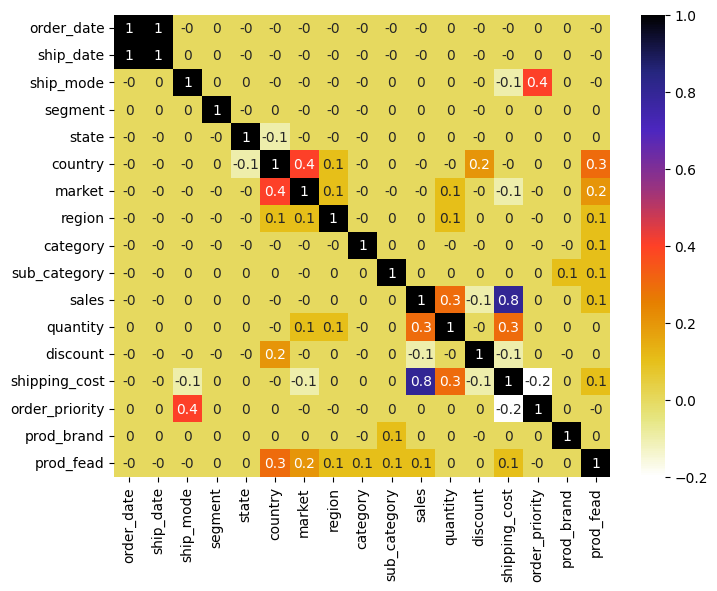

In [62]:
import seaborn as sns

plt.figure(figsize = (8,6))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [63]:
x = clean_df.drop('shipping_cost',axis=1)

Text(0.5, 1.0, 'show')

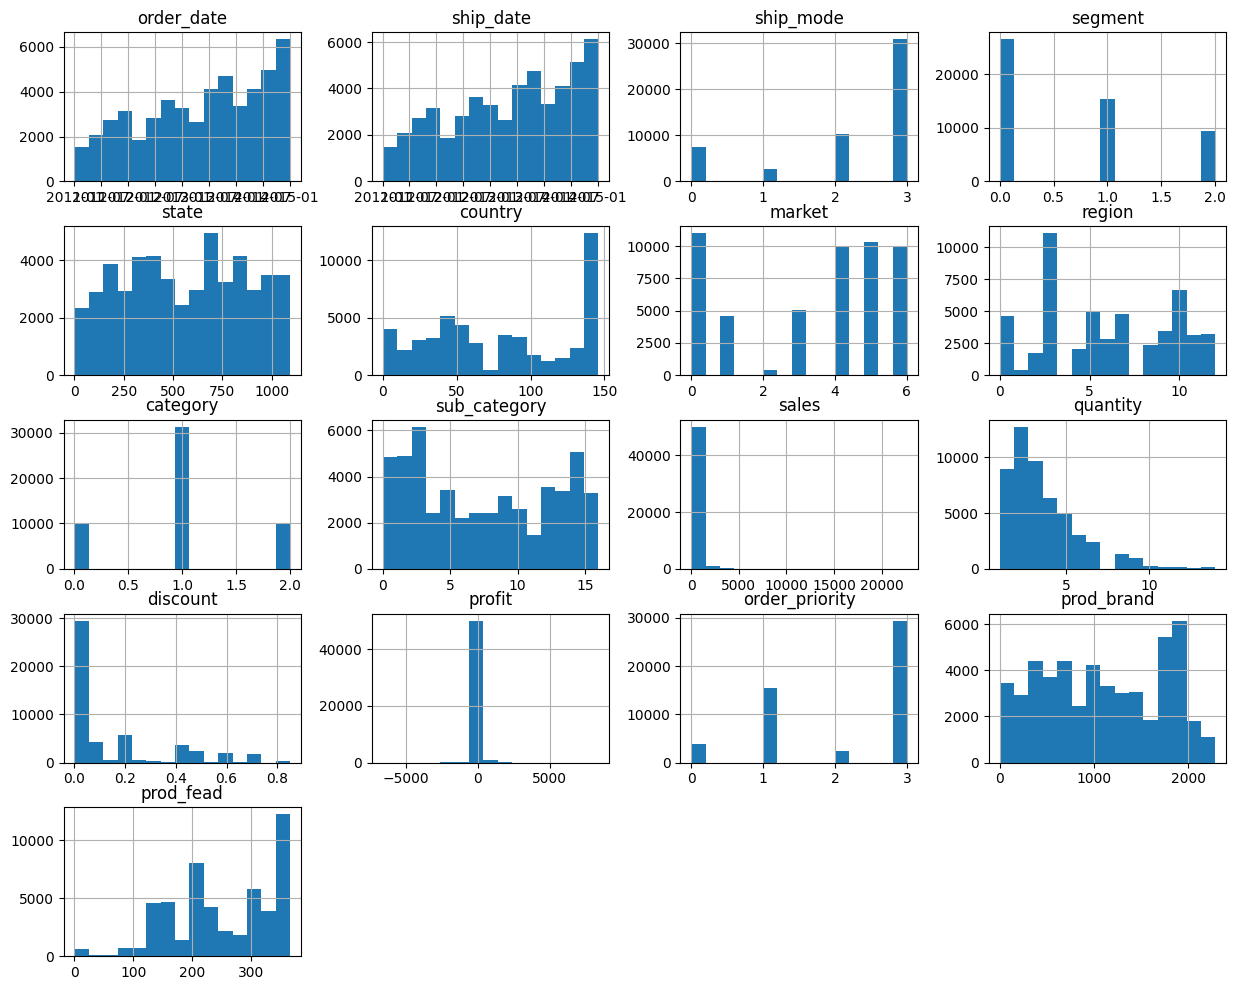

In [64]:
x.hist(figsize=(15,12),bins=15)

<Axes: >

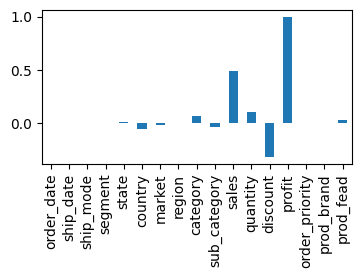

In [67]:
x.corr()['profit'][:].plot(figsize=(4,2), kind='bar')

In [68]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [70]:
print(correlation(clean_df, .1))

{'discount', 'shipping_cost', 'market', 'country', 'prod_fead', 'order_priority', 'prod_brand', 'region', 'quantity', 'ship_date', 'profit'}


In [76]:
a = pd.array([1,1,2,2,3,3])
print(a.shape)


(6,)
